# Predicting Loan Interest Rates

### Introduction

**Step 1**:
Clean and prepare the data. There are truly missing and simulated missing values. Clean them.

**Step 2**:
Build a machine learning model in Python to predict the interest rates
assigned to loans. Structure your code into two parts: a first part that
trains the model on the training data, and a second part runs the model on the
training data and the test data.

**Step 3**:
Submit code for cleaning, prepping and modeling the data, along with a
discussion of how you designed and implemented your model. Include a discussion
of the performance of the model on the training data, for which you can
compare the actual loan interest rate with the rate predicted by your model.
Show the RMSE your model achieves on the training data.

## Step 1: Import, clean and prepare the data:

Let's first import the data

In [91]:
# import necessary python modules for analysis
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

In [92]:
# import training_data.csv via pandas module
train = pd.read_csv("training_data.csv", low_memory=False)

# import test_data.csv via pandas module
test = pd.read_csv("test_data.csv", low_memory=False)

### Import the metadata

In [93]:
# import metadata.csv via pandas module to get the metadata on the data set variables
metadata = pd.read_csv("metadata.csv")
metadata

,Variable,Definition
0,X1,Interest Rate on the loan
1,X2,A unique id for the loan.
2,X3,A unique id assigned for the borrower.
3,X4,Loan amount requested
4,X5,Loan amount funded
5,X6,Investor-funded portion of loan
6,X7,Number of payments (36 or 60)
7,X8,Loan grade
8,X9,Loan subgrade
9,X10,Employer or job title (self-filled)


Now we will look at the data types of each column and look for missing/null values within the data. 

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376018 non-null object
X11    399999 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123561 non-null object
X17    399999 non-null object
X18    399982 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
X1     0 non-null float64
X2     80000 non-null int64
X3     80000 non-null int64
X4     80000 non-null object
X5     80000 non-null object
X6     80000 non-null object
X7     80000 non-null object
X8     80000 non-null object
X9     80000 non-null object
X10    75606 non-null object
X11    80000 non-null object
X12    80000 non-null object
X13    80000 non-null float64
X14    80000 non-null object
X15    80000 non-null object
X16    15 non-null object
X17    80000 non-null object
X18    80000 non-null object
X19    80000 non-null object
X20    80000 non-null object
X21    80000 non-null float64
X22    80000 non-null int64
X23    80000 non-null object
X24    80000 non-null int64
X25    41296 non-null float64
X26    13839 non-null float64
X27    80000 non-null int64
X28    80000 non-null int64
X29    80000 non-null int64
X30    79970 non-null object
X31    80000 non-null int64
X3

### Drop X2, X3 as they are unique identifiers for each loan and borrower and not useful for our model

In [96]:
# drop X2 and X3 from training and test set
train.drop(['X2', 'X3'], axis=1, inplace=True)
test.drop(['X2', 'X3'], axis=1, inplace=True)

### X1, our dependent variable (loan interest rate), is missing about 61000 values

We will create a data set where the rows containing these missing values are removed and we'll create another data set where we impute the missing values with the average of the loan interest rate column. We will eventually run our prediction model(s) on both data sets to decipher which method is better for predicting.

Note: With more time, perhaps a better method of imputing these missing values would be to partition the training data into clusters using, say, a KNN clustering algorithm and, the cluster that has an average or centroid that's closest to the centroid of the cluster of datum with these missing interest rate values, would be the cluster that we would take the corresponding average interest rate of and impute the original missing interest rate values with. 

In [97]:
# remove '%' from interest rate column and change dtype to numeric
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', ''))/100

# drop the rows with missing interest rate values
train = train.dropna(subset=['X1'])

There seems to be one row within the training data set with all missing values besides the 
loan interest rate value. Here we will remove this row:

In [98]:
train.dropna(subset=['X4'], inplace=True)

There are over 61,000 missing values for the X8 and X9 columns, which correspond to loan grades and loan subgrades. As these are categorical variables, a good way to impute these missing values may be, again, via the unsupervised clustering method mentioned above with the missing interest rate values. But, in the interest of time, we will drop these rows from the data frame instead. 

In [99]:
# drop X8 and X9 columns: loan grade and subgrade
train.dropna(subset=['X8', 'X9'], inplace=True)

### Remove column X16: Reason for applying for loan

As more than 50% of its values are missing and it is the borrower's reason for applying for the loan; this is another relatively unique text data type that will most likely not be useful for our model. Our test set only has 15 out 80000 values available for this column as well, so it is definitely not a useful for our model, where the ultimate goal is to predict on the test set.

In [100]:
# remove X16 from training set
train.drop(['X16'], axis=1, inplace=True)

# remove X16 from test set
test.drop(['X16'], axis=1, inplace=True)

### Remove column X10: Borrower-provided job title

Column X10, which corresponds to borrower-entered employer or job title, is missing almost 20000 values. This is also another unique character data type that won't be as useful to our model, so we will remove the variable altogether from both the test and training data set.

In [101]:
# remove X10 from training set
train.drop(['X10'], axis=1, inplace=True)

# remove X10 variable from tests set
test.drop(['X10'], axis=1, inplace=True)

### Remove rows where X13 column has missing values: Annual Income
As we cannot impute these missing values since it would create false information in a feature that, intuitively, would seem to be a good predictor of loan interest rates.

In [102]:
# drop rows where there are missing values for X12 column from data set
train.dropna(subset=['X13'], inplace=True)

### Remove X18 column: Loan Title
This column is not useful for our predictive model as it is the borrower-provided loan title; it's another text data type unique to each observation with seemingly no impact on our target variable (interest rate).

In [103]:
# remove X10 from training set
train.drop(['X18'], axis=1, inplace=True)

# remove X10 variable from test set
test.drop(['X18'], axis=1, inplace=True)

### Remove X25 and X26 from data sets: # of months since last delinquency and public record

I will delete these variables with reluctance as, intuitively, both of these variables would seem to be correlated with the interest rate assigned to a loan, but they both have more than 50% of their values missing in both the training and test data, we will remove the columns altogether.

In [104]:
# remove X10 from training set
train.drop(['X25', 'X26'], axis=1, inplace=True)

# remove X10 variable from test set
test.drop(['X25', 'X26'], axis=1, inplace=True)

### Remove rows with missing values in X30 column: credit utilization percentage...

since there are only about 154 missing values in this column, we will delete these rows from both the training and the test sets

In [105]:
# drop rows where there are missing values for X30 column from data set
train.dropna(subset=['X30'], inplace=True)

# convert X30 to numeric data type
test['X30'] = pd.to_numeric(test['X30'].str.replace('%', ''))

# fill rows in test data where there are missing values for X30 column with median values
test['X30'] = test['X30'].fillna(test.X30.median(axis=0))

### Remove X17: Loan Category (provided by Borrower) from data sets...
as the category of a loan, intuitively, doesn't seem to be an important feature that would be as relative to the interest rate compare to other features.

In [106]:
# remove X10 from training set
train.drop(['X17'], axis=1, inplace=True)

# remove X10 variable from test set
test.drop(['X17'], axis=1, inplace=True)

### Remove X1 (interest rate) variable from test set

This is the target variable that we are predicting for our test set, so we remove this empty column (and will replace it with our predictions later).

In [107]:
test.drop(['X1'], axis=1, inplace=True)

### Remove X11 (Years of Employment) column from training and test sets...

as both data sets have quite a few 'n/a' values and we do not want to remove any rows from the test set we are predicting for.

In [108]:
print(test.X11.unique(), train.X11.unique())

['10+ years' '8 years' '< 1 year' '7 years' '2 years' '5 years' '1 year'
 '6 years' '9 years' '3 years' '4 years' 'n/a'] ['< 1 year' '1 year' '10+ years' '6 years' '9 years' '3 years' '5 years'
 '2 years' '4 years' '8 years' '7 years' 'n/a']


In [109]:
print("Number of 'n/a' values in X11 column in test set: ", len(test[test.X11=='n/a']))
print("Number of 'n/a' values in X11 column in training set: ", len(train[train.X11=='n/a']))

Number of 'n/a' values in X11 column in test set:  4382
Number of 'n/a' values in X11 column in training set:  10570


In [110]:
# drop X11 from trainig and test sets
test.drop(['X11'], axis=1, inplace=True)
train.drop(['X11'], axis=1, inplace=True)

### Remove X15 (Date Loan was Issued)
Even though I think base interest rates may oscillate during certains months of any year, like seasons, this feature doesn't seem to be as strong as some of the other features, intuitively.

In [111]:
# drop X15 from trainig and test sets
test.drop(['X15'], axis=1, inplace=True)
train.drop(['X15'], axis=1, inplace=True)

### Remove X20 column (State)

Since we already have a more granular location feature being used for our model: first three of zip code

In [112]:
# drop X20 from trainig and test sets
test.drop(['X20'], axis=1, inplace=True)
train.drop(['X20'], axis=1, inplace=True)

### Remove X23 column (Date of Earliest Line of Credit) from training and test set

This could be converted into years, days, or even seconds since earliest line of credit in integer format, but for this model we will exclude this column. Furthermore, we could have also created a new feature by subtracting this feature (converted into an integer) from the date the loan was issued to have a relative picture how long credit establishment effects interest rates.

In [113]:
# drop X19 and X20 from training and test sets
test.drop(['X23'], axis=1, inplace=True)
train.drop(['X23'], axis=1, inplace=True)

### Remove X32 column (Initial Listing Status of Loan) from training and test set

As I do not think these initial listing status' would be available when predicting an interest rate for new customers.

In [114]:
# drop X19 and X20 from trainig and test sets
test.drop(['X32'], axis=1, inplace=True)
train.drop(['X32'], axis=1, inplace=True)

### Remove X12 Column (Home Ownership Status)

With reluctance as this feature does seem, intuitively, to correlate with loan interest rate, I'm not exactly sure it would be as strong of a predictor as other variables in the data set. 

Also, since there are a few ambiguous categories (i.e. NONE, OTHER, & ANY) AND nan values, it may make more sense to remove the column altogether as we don't want to combine or impute these values at the cost of creating incorrect signal for our model.

In [115]:
print("Unique categories in Home Ownership variable: ", train.X12.unique())

Unique categories in Home Ownership variable:  ['RENT' 'OWN' 'MORTGAGE' 'NONE' nan 'OTHER' 'ANY']


In [116]:
# drop X12 from trainig and test sets
test.drop(['X12'], axis=1, inplace=True)
train.drop(['X12'], axis=1, inplace=True)

### Convert string columns to appropriate numeric data types in training data

In [117]:
train['X4'] = train['X4'].str.replace('$', '')
train['X4'] = pd.to_numeric(train['X4'].str.replace(',', ''))
train['X5'] = train['X5'].str.replace('$', '')
train['X5'] = pd.to_numeric(train['X5'].str.replace(',', ''))
train['X6'] = train['X6'].str.replace('$', '')
train['X6'] = pd.to_numeric(train['X6'].str.replace(',', ''))
train['X7'] = pd.to_numeric(train['X7'].str.replace(' months', ''))
train['X19'] = pd.to_numeric(train['X19'].str.replace('x', ''))
train['X21'] = train['X21']/100 # convert dti percentage to ratio
train['X13'] = train['X13'].astype(int) # convert to interger type
train['X22'] = train['X22'].astype(int) # convert to interger type
train['X24'] = train['X24'].astype(int) # convert to interger type
train['X27'] = train['X27'].astype(int) # convert to interger type
train['X28'] = train['X28'].astype(int) # convert to interger type
train['X29'] = train['X29'].astype(int) # convert to interger type
train['X30'] = train['X30'].str.replace('%', '')
train['X30'] = pd.to_numeric(train['X30'].str.replace(',', ''))/100
train['X31'] = train['X31'].astype(int) # convert to interger type

### Create integer labels for categorical variables in training data

In [118]:
# instatiate sklearn's labelencoder
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
train['X8'] = le.fit_transform(train['X8'].values)
train['X9'] = le.fit_transform(train['X9'].values)
train['X14'] = le.fit_transform(train['X14'].values)

### Look over training data values, types, and summary statistics 

To ensure there are no abnormalities (missing or outlier values) and all data types of features are as intended

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242983 entries, 0 to 399999
Data columns (total 18 columns):
X1     242983 non-null float64
X4     242983 non-null int64
X5     242983 non-null int64
X6     242983 non-null int64
X7     242983 non-null int64
X8     242983 non-null int64
X9     242983 non-null int64
X13    242983 non-null int64
X14    242983 non-null int64
X19    242983 non-null int64
X21    242983 non-null float64
X22    242983 non-null int64
X24    242983 non-null int64
X27    242983 non-null int64
X28    242983 non-null int64
X29    242983 non-null int64
X30    242983 non-null float64
X31    242983 non-null int64
dtypes: float64(3), int64(15)
memory usage: 35.2 MB


In [120]:
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,0.1189,25000,25000,19080,36,1,8,85000,0,941,0.1948,0,0,10,0,28854,0.521,42
1,0.1071,7000,7000,673,36,1,9,65000,2,112,0.1429,0,0,7,0,33623,0.767,7
2,0.1699,25000,25000,24725,36,3,17,70000,0,100,0.1050,0,0,10,0,19878,0.663,17
3,0.1311,1200,1200,1200,36,2,11,54000,2,777,0.0547,0,0,5,0,2584,0.404,31
4,0.1357,10800,10800,10692,36,2,12,32000,2,67,0.1163,0,1,14,0,3511,0.256,40


In [121]:
# use this cell for looking at columns once converted to numeric data types
train.describe()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X19,X21,X22,X24,X27,X28,X29,X30,X31
count,242983.000000,242983.000000,242983.000000,242983.000000,242983.0000,242983.000000,242983.000000,2.429830e+05,242983.000000,242983.000000,242983.000000,242983.000000,242983.000000,242983.000000,242983.000000,2.429830e+05,242983.000000,242983.000000
mean,0.139406,14267.531062,14237.459102,14163.732150,42.4365,1.812530,11.041484,7.312063e+04,0.945399,514.726899,0.170043,0.275233,0.818831,11.120967,0.153064,1.594181e+04,0.562925,24.979838
std,0.043811,8260.262613,8246.054200,8270.265388,10.6324,1.320213,6.531771,5.657148e+04,0.831274,316.807345,0.076893,0.784393,1.060841,4.887522,0.519584,1.923258e+04,0.237849,11.468621
min,0.054200,500.000000,500.000000,0.000000,36.0000,0.000000,0.000000,3.000000e+03,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,0.109900,8000.000000,8000.000000,8000.000000,36.0000,1.000000,6.000000,4.500000e+04,0.000000,223.000000,0.112700,0.000000,0.000000,8.000000,0.000000,6.465000e+03,0.394000,17.000000
50%,0.136800,12000.000000,12000.000000,12000.000000,36.0000,2.000000,10.000000,6.274400e+04,1.000000,480.000000,0.167100,0.000000,0.000000,10.000000,0.000000,1.177400e+04,0.579000,23.000000
75%,0.167800,20000.000000,20000.000000,19875.000000,60.0000,3.000000,15.000000,8.800000e+04,2.000000,826.000000,0.225000,0.000000,1.000000,14.000000,0.000000,2.022100e+04,0.749000,32.000000
max,0.260600,35000.000000,35000.000000,35000.000000,60.0000,6.000000,34.000000,7.500000e+06,2.000000,999.000000,0.399900,29.000000,8.000000,62.000000,63.000000,2.568995e+06,8.923000,118.000000


### Convert string columns values to appropriate numeric data types in test data

In [122]:
test['X4'] = test['X4'].str.replace('$', '')
test['X4'] = pd.to_numeric(test['X4'].str.replace(',', ''))
test['X5'] = test['X5'].str.replace('$', '')
test['X5'] = pd.to_numeric(test['X5'].str.replace(',', ''))
test['X6'] = test['X6'].str.replace('$', '')
test['X6'] = pd.to_numeric(test['X6'].str.replace(',', ''))
test['X7'] = pd.to_numeric(test['X7'].str.replace(' months', ''))
test['X19'] = pd.to_numeric(test['X19'].str.replace('x', ''))
test['X21'] = test['X21']/100 # convert dti percentage to ratio
test['X13'] = test['X13'].astype(int) # convert to interger type
test['X30'] = test['X30']/100 # convert revolving utilization to ratio

### Create integer labels for categorical variables in test data

In [123]:
# instatiate sklearn's labelencoder
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
test['X8'] = le.fit_transform(test['X8'].values)
test['X9'] = le.fit_transform(test['X9'].values)
test['X14'] = le.fit_transform(test['X14'].values)

### Separate the training data predictors from the targets

In [124]:
# extract target variable (interest rate) from training data
target = train['X1']

# remove interest rate column from training data
predictors = train.drop(['X1'], axis=1)

## Step 2: Build Machine Learning model in Python to predict the interest rates assigned to loans. 

Structure your code into two parts: a first part that trains the model on the training data, and a second part runs the model on the training data and the test data.

### Train the RidgeCV regression model on the training data

In [132]:
# instantiate linear regression object
ridge = RidgeCV(cv=10)

# fit or train the linear regression model on the training set and store parameters
ridge.fit(predictors, target)

# show the alpha parameter used in final ridgeCV model
ridge.alpha_

# show the coefficients of each variable
# ridge.coef_

10.0

### Predict interest rates on training and test data - Display training prediction RMSE

In [126]:
# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = ridge.predict(predictors)

ridge_test_pred = ridge.predict(test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(target, train_pred)))

RMSE on training data:  0.00903810307548


An RMSE of 0.009 doesn't seem to be bad, especially for a general linear regression model using that only uses ridge regression to account for potential multicollineararity between features. Also, this linear model is pretty fast in computation time and seemingly straightforward in deploying and maintaing within production. However, without having RMSE's of other models to compare it to, it is difficult to understand the true value of or whether or not this model is "good" or even "fair". So we will try another machine learning technique to compare the models RMSE scores.

### Create Extreme Gradient Boosted Decision Tree Model using XGBoost

Extreme gradient boosting is a Kaggle-popular machine learning technique that can be used on supervised learning problems like classification and regression problems. The model creates an ensemble of relatively weak prediction models or "learners" (usually decision trees, but linear models can be used as well). The weak learners (decision trees with, say, one or two logical conditions applied to samples of the data) are built sequentially and the output of each learner corresponds to the weight the algorithm gives to the outcomes in the subsequent learner, at least in classification; in regression, however, at each iteration, a new tree learns the gradients of the residuals between the target values and the current predicted values, and then the algorithm conducts gradient descent based on the learned gradients. That is, at each iteration, the learners are combined and start to predict the training data more accurately, becoming increasingly complex along the way.

Finally, each learner is applied a weight  and a combined model is built for final analysis/predicting.

XGBoost is a specific implementation of gradient boosted decision trees designed for speed and performance. It is most known and used for its 'regularized boosting' technique, its fast, parallel processing in its decision tree building (leading to potential scalable production), and its relatively high customization options with hyperparameters. 

### Gradient Boosting Explained:


* Make a set of predictions: $\hat{y}[i]$


* The "error" in our predictions is: $E(y, \hat{y})$ ("MSE" loss function used by default)


* "Adjust" $\hat{y}$ to reduce error: $\hat{y}[i] = \hat{y}[i] + alpha * f[i]$


* $f[i] = \bigtriangledown E(y, \hat{y})$ (i.e. the loss function)


* Each learner is estimating the gradient of the loss function 


* Gradient Descent: take sequence of steps to reduce (descend) the Error


* Each predictor is summed together, weighted by the alpha step size or "learning rate" to create the final model

In [127]:
import xgboost as xgb
from xgboost import plot_importance

Split the training set into a training and validation set to make sure our model doesn't significantly overfit our training data and perform poorly on our test data and create parameter dictionary to use in the model (manually, trial-and-error tuned).

### Train the xgb model on a train_test_split of the training data with a manually-tuned set of hyperparameters

In [128]:
# split training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    predictors,
    target,
    test_size=.2,
    random_state=42)

# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:0.327271
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.294572
[2]	Test-rmse:0.265146
[3]	Test-rmse:0.238664
[4]	Test-rmse:0.214834
[5]	Test-rmse:0.193388
[6]	Test-rmse:0.174092
[7]	Test-rmse:0.156728
[8]	Test-rmse:0.141103
[9]	Test-rmse:0.127046
[10]	Test-rmse:0.1144
[11]	Test-rmse:0.103024
[12]	Test-rmse:0.092792
[13]	Test-rmse:0.083591
[14]	Test-rmse:0.075317
[15]	Test-rmse:0.067879
[16]	Test-rmse:0.061194
[17]	Test-rmse:0.055186
[18]	Test-rmse:0.049792
[19]	Test-rmse:0.044949
[20]	Test-rmse:0.040604
[21]	Test-rmse:0.036708
[22]	Test-rmse:0.033219
[23]	Test-rmse:0.030096
[24]	Test-rmse:0.027307
[25]	Test-rmse:0.024816
[26]	Test-rmse:0.022597
[27]	Test-rmse:0.020624
[28]	Test-rmse:0.018874
[29]	Test-rmse:0.017319
[30]	Test-rmse:0.015954
[31]	Test-rmse:0.01475
[32]	Test-rmse:0.013698
[33]	Test-rmse:0.01278
[34]	Test-rmse:0.011981
[35]	Test-rmse:0.011295
[36]	Test-rmse:0.010704
[37]	Test-rmse:0.010191
[38]	Test-rmse:0.00976
[39]	Test-rmse:0.00939

[332]	Test-rmse:0.007019
[333]	Test-rmse:0.007019
[334]	Test-rmse:0.007018
[335]	Test-rmse:0.007018
[336]	Test-rmse:0.007017
[337]	Test-rmse:0.007017
[338]	Test-rmse:0.007017
[339]	Test-rmse:0.007018
[340]	Test-rmse:0.007018
[341]	Test-rmse:0.007018
[342]	Test-rmse:0.007018
[343]	Test-rmse:0.007018
[344]	Test-rmse:0.007016
[345]	Test-rmse:0.007016
[346]	Test-rmse:0.007016
[347]	Test-rmse:0.007015
[348]	Test-rmse:0.007016
[349]	Test-rmse:0.007015
[350]	Test-rmse:0.007014
[351]	Test-rmse:0.007014
[352]	Test-rmse:0.007014
[353]	Test-rmse:0.007014
[354]	Test-rmse:0.007014
[355]	Test-rmse:0.007014
[356]	Test-rmse:0.007014
[357]	Test-rmse:0.007014
[358]	Test-rmse:0.007012
[359]	Test-rmse:0.007012
[360]	Test-rmse:0.007012
[361]	Test-rmse:0.007012
[362]	Test-rmse:0.007011
[363]	Test-rmse:0.007011
[364]	Test-rmse:0.00701
[365]	Test-rmse:0.00701
[366]	Test-rmse:0.00701
[367]	Test-rmse:0.00701
[368]	Test-rmse:0.00701
[369]	Test-rmse:0.00701
[370]	Test-rmse:0.007009
[371]	Test-rmse:0.007009
[372]	

In [129]:
# convert training data to DMatrix object
dpred=xgb.DMatrix(predictors)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), target)))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(test))

RMSE of XGB model on training data:  0.00663681909919


### Plot importance of features via F-score provided by GBDT model

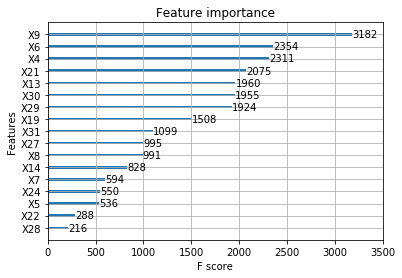

In [130]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

Interestingly, it looks like the loan subgrade is the most important feature in predicting interest loan rates with the amount requested and invester funded portion of the loans coming in at the third and second most important. The number of 30 day+ delinquencies in payments and the number of derogatory public records were the least important features.

In [131]:
# write out csv for each model's test predictions
linear_test_pred = pd.DataFrame(ridge_test_pred, columns=['RidgePredictions'])

XGB_test_pred = pd.DataFrame(GBDT_test_pred, columns=['XGBPredictions'])

test_predictions = pd.concat([linear_test_pred, XGB_test_pred], axis=1)

test_predictions.to_csv("Ryan_Schaub_test_predictions.csv")

## Discussion of Model Selection, Design, and Results:

### Ridge Regression Model:

The first model I selected to predict interest rates was a ridge regression model using scikitlearn's RidgeCV() esitmator. Ridge regression is a multiple linear regression model, where multiple linear regression assumes that the target, numerical variable (interest rate) is a combined linear function of multiple numeric features. Ridge regression is advantageous to a base linear regression estimator in that it penalizes or regularizes (using the L2 norm) the model's coefficient values for specific features that correlate highly with other features or predictors, also known as multicolinearity. 

Scikit-learn's RidgeCV() object allows for the alpha parameter, or regularization strength parameter, to be optimized via cross-validation selection, where each of the alpha parameters given (I used the default parameter values) are tested on the training data and the alpha parameter that produces the highest accuracy scores will be stored in the model object for predictions. An advantage of using linear regression models is their relative ease of use, fast computation times, and straightforward deployment and maintenance in production environments.


### Ridge Regression Performance:

The RidgeCV regression model (with 10-fold cv technique used to optimize alpha parameter) produced an RMSE of 0.0090 when predicting on the training data. This RMSE implies that the root average of the model's squared residual errors in prediction is roughly the equivalent of plus or minus 0.90 of the the true value of the interest rate, since the interest rate was scaled down during preprocessing (divided by 100). 

A potential improvement to the linear regression model would be to attempt to regress on the interest rate using an elastic net regularization model, which combines L2 and L1 norm regularization methods in order to optimize coefficient values of features in detecting the true, combined feature signal. This may not always be a better solution, but, in production, it may be worth verifying.

### Extreme Gradient Boosted Decision Tree Model:

As discussed above, extreme gradient boosting is a very popular machine learning model being used ubiquitously in regression and classification problems, specifically in Kaggle-based competitions. The model's have proven to produce high performance measures as it uses a sequential series of "weaker" decision tree models to learn the data's signal using gradient descent on the loss function of each sub-model. The model then combines the accuracies of each model, using a weighted sum of predictions, to produce a best-fitting or highest-performing model. The speed of the models are valued as well.

I specifically used XGBoost's python module xgboost as it provides relatively high customization options for hyperparameters and relatively fast processing with its built-in parellel processing when building decision trees. Many of the model's default parameters work well for this regression problem, but there were a few that I manually tuned via trial-and-error efforts. Specifically:

* **max_depth:** the max_depth of each decision tree built. This is used to control over-fitting of the training data as higher depths will fit to more noise in the training data. Final value used: 6


* **min_child_weight:** this is the sum of the weights defined for each child of each learner. This is used to also control overfitting of training data. (higher values == more regularization for each sample in a tree). Final value used: 1


* **eta:** this is essentially the learning rate of the model or the alpha value when gradient descent occurs. This makes the model more robust by shrinking the weights on each step for gradient descent. Final value used: .1


* **subsample:** the fraction of observations to be randomly sampled for each tree. Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Final value: 1


* **colsample_bytree:** similar to subsample except it is the fraction of columns to be randomly sampled for each tree. Final value: 1


* **num_boosting_rounds:** the number of iterations or trees built to produce the best accuracy measure when training the model and testing its accuracy on allocated test data. Final value: 441


* **early_stopping_rounds:** this threshold tells the model how many test accuracy scores to look back upon during training iterations. If the testing scores don't improve after 10 consecutive iterations, the model will stop and take the best score. Final value: 10

The hyperparameters of the model were tuned in a less-than-optimal way in exchange for computational efforts; that is, I manually tuned each of the above hyperparameters with a bit of intuition and trial-and-error efforts (running the model with different values set and choosing the best performing parameter values). A much more optimal way of tuning the model's parameters would be to do a cross-validation search of the best combination of parameters, most likely including choices for other available, tunable parameters as well. However, in the interest of computational time (and our time), I manually tuned the model instead. 

It should be noted that I trained the XGB model on only 90% of the training data as the other 10% was randomly sampled from the training data and allocated as test data to optimize the general fit of the model during training. This helps ensure that overfitting doesn't occur on the training data.

### Extreme Gradient Boosting Performance:

The RMSE of the XGB model on the training data was roughly 0.0066. This is lower than the ridge regression model's RMSE, but does come at the cost of computational time for training and predicting. It would be interesting to see if the above-mentioned improvement suggestions would allow for an increase in performance that may be worth the extra computational time in production. Although both models were regularized and optimized to prevent overfitting as much as possible, I would expect the RMSE values on the test set predictions from both models to be slightly higher than their respective training set RMSE's as the models are naturally going to predict better on the data that they were trained on.

### Reflection and Improvement Suggestions:

Although they do outperform some models I've seen on Kaggle, I believe both of the models created can be improved for better performance, which would be ideal for production. The extreme gradient boosting decision tree model outperforms the regression model with an RMSE of 0.0066 compared to RidgeCV's 0.0090, but it does come at the cost of computational time and effort. Furthermore, I believe my preprocessing techniques were limited to my inuitive (and learned) understanding of features that may influence interest rates of loans. I removed quite a few columns from the data that may have been useful indicators. The above plot of F-scores for each feature used in predicting shows that loan subgrades are highly correlated with interest rates while the number of delinquencies and derogatory public records were the least important features. 

Upon reflection, I would have given every feature its chance in predicting interest rates and used a more empirical of statistical techniques in evaluating features for preprocessing, like using extreme gradient boosting F-scores to detect and display the most important features. From there I could potentially choose more important features and omit less important features, as well as engineer new features out of highly important features to create stronger signals. For example, I would look futher into the relationship between loan subgrades and interest rate by generating a scatter plot of the two variables to discern if there is a specific relationship between the two and alter the loan subgrade feature or create a new feature using this feature to model the relationship better when predicing.